# Cluster Analysis Using kMeans from Scikit-Learn
- Use kmeans to classify customers as churned or not churned

## Data Sources
- churn_clean.csv: provided in WGU task prompt

In [1]:
import sys
print(sys.version)

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]


## Imports

In [2]:
# Data handling package
import pandas as pd
# Used in data prepartation for kmeans
from sklearn.preprocessing import StandardScaler
#Used to Split the data into train and test sets
from sklearn.model_selection import train_test_split
# Used in model building
from sklearn.cluster import KMeans
# Used to assess kmeans classifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Used for Data Visualizations
import matplotlib.pyplot as plt

## Data Preparation

In [3]:
# Import full data set
df = pd.read_csv('churn_clean.csv')

# Assign churn to variable y
y = df.Churn
y.replace('Yes', 1, inplace=True)
y.replace('No', 0, inplace=True)

# List Continuous Features to Keep
keep_list =['Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

# Create new DataFrame using desired features
df_num = df[keep_list]

# Standardize the Features
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

# Export to csv
df_std.to_csv('churn_prepared.csv', index=False)

df_std.head()

,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.398778,-0.679978,-1.048746,-0.003943,-1.138487
1,-0.641954,0.570331,-1.262001,1.630326,-1.185876
2,-1.070885,0.252347,-0.709940,-0.295225,-0.612138
3,-0.740525,1.650506,-0.659524,-1.226521,-0.561857
4,0.009478,-0.623156,-1.242551,-0.528086,-1.428184


## Model Building

In [4]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(df_std, y, test_size=0.25, random_state=830)

# Save datasets to CSVs
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

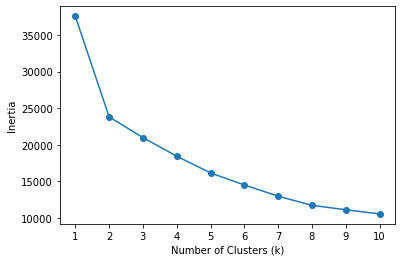

In [5]:
# Run multiple KMeans models to find a good number of clusters
inertia_vals = []
clusters = []

for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(X_train)
    inertia_vals.append(model.inertia_)
    clusters.append(i)
    
# Assess models to find the elbow of the lineplot
plt.plot(clusters, inertia_vals,'-o')
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters (k)')
plt.xticks(clusters)
plt.show();

In [6]:
# Instantiate with 2 clusters based on the elbow plot above
km = KMeans(n_clusters=2)

# Fit the model to the training data
km.fit(X_train)

# Predict labels for the test data
cluster = km.predict(X_test)

## Model Evaluation

In [7]:
# Check model with crosstab
ct_df = pd.DataFrame({'cluster':y_test,'churn':cluster})

ct = pd.crosstab(ct_df['churn'], ct_df['cluster'])
ct

cluster,0,1
churn,,
0,671,579
1,1179,71


In [8]:
# Check the model accuracy
print('kMeans Classification Accuracy: %.2f'%accuracy_score(y_test, cluster))

kMeans Classification Accuracy: 0.30


In [9]:
print('kMeans Predicted Churn Rate: %.2f'%cluster.mean())
print('Actual Churn Rate: %.2f'%y_test.mean())

kMeans Predicted Churn Rate: 0.50
Actual Churn Rate: 0.26


In [10]:
from sklearn.linear_model import LogisticRegression

# Instantiate and fit the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict labels of test data
y_pred = lr.predict(X_test)

# Compute accuracy of model
print('Logistic Regression Accuracy: %.2f'%accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.84
